In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [186]:
settings_0flux = [
    "?name=0flux?J_pm=-0.046?B=[0.000,0.000,0.000].jld",
    "?name=0flux?J_pm=-0.046?B=[0.000,0.042,0.042].jld",
    "?name=0flux?J_pm=-0.046?B=[0.035,0.035,0.035].jld"
]

settings_piflux = [
    "?name=piflux?J_pm=0.333?B=[0.000,0.000,0.000].jld",
    "?name=piflux?J_pm=0.333?B=[0.000,0.042,0.042].jld",
    "?name=piflux?J_pm=0.333?B=[0.035,0.035,0.035].jld"
]

settings_pipi00 = [
    "?name=pipi00-kludge?J_pm=-0.050?B=[0.212,0.212,0.000].jld",
    # "?name=pipi00-kludge?J_pm=-0.050?B=[0.283,0.283,0.000].jld",
    "?name=pipi00-kludge?J_pm=-0.050?B=[0.354,0.354,0.000].jld",
    "?name=pipi00-kludge?J_pm=-0.050?B=[0.424,0.424,0.000].jld"
]

settings_FF_kludge = [
    "?name=FF-kludge?J_pm=-0.010?B=[0.100,0.100,0.100].jld",
    # "?name=FF-kludge?J_pm=-0.020?B=[0.141,0.141,0.141].jld",
    "?name=FF-kludge?J_pm=-0.050?B=[0.224,0.224,0.224].jld",
    "?name=FF-kludge?J_pm=-0.100?B=[0.316,0.316,0.316].jld"
]
    


Text(0.5, 1.0, '111 field, $|B|$=0.06')

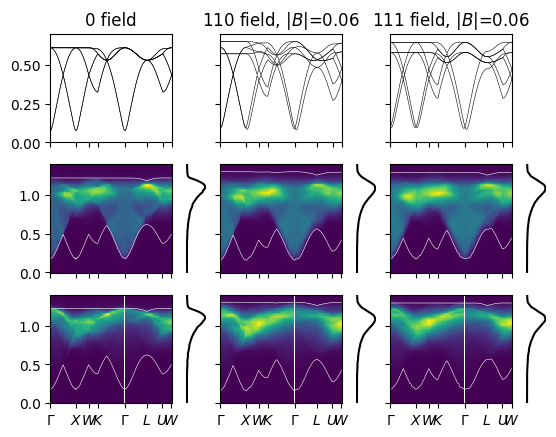

In [201]:
# ZERO FLUX

fig, Ax = plt.subplots(nrows=3, ncols=6,sharex=False, sharey=False,width_ratios=[3,0.5,3,0.5,3,0.5])

# autorange sweep
spinon_max_E=-float("inf")
intens_max_E=-float("inf")
intens_max_Spm=-float("inf")
intens_max_Smagnetic=-float("inf")

settings = settings_0flux


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])
    fsp = h5py.File("output/spinons"+settings[i])
    spinon_max_E = max(spinon_max_E, np.max(fsp["spinon_dispersion"]["bands"]))
    intens_max_E = max(intens_max_E, np.max(intensity_file["intensity"]["W"]))
    intens_max_Spm = max(intens_max_Spm, np.max(intensity_file["intensity"]["Spm"]["re_"]) )
    intens_max_Smagnetic = max(intens_max_Smagnetic, np.max(np.ma.masked_invalid(intensity_file["intensity"]["Smagnetic"])))


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])

    intens=intensity_file["intensity"]
    Ax[1][2*i].pcolormesh(intens["tau"], intens["W"], intens["Spm"]['re_'], shading='nearest')#, vmax=intens_max_Spm)
    Ax[2][2*i].pcolormesh(intens["tau"], intens["W"], intens["Smagnetic"],shading='nearest')#, vmax=intens_max_Smagnetic)

    for a in (Ax[1][2*i], Ax[2][2*i]):
        a.plot(np.array(intens["tau"]), intens["bounds"][0], color='w',lw=0.4)
        a.plot(np.array(intens["tau"]), intens["bounds"][1], color='w',lw=0.4)


    Ax[1][2*i].set_xticks(intens["ticks_tau"], labels=[])
    Ax[2][2*i].set_xticks(intens["ticks_tau"], labels=["$%s$"%(x.decode("UTF8")) for x in intens["ticks_label"]])
              

    fsp = h5py.File("output/spinons"+settings[i])
    spinon_intens = fsp["spinon_dispersion"]
    Ax[0][2*i].plot(np.array(spinon_intens["tau"]), np.array(spinon_intens["bands"]).T, color='k', lw=0.4)
    Ax[0][2*i].set_ylim([0,spinon_max_E+0.05])
    Ax[0][2*i].set_xticks(spinon_intens["ticks_tau"], labels=[])
    Ax[0][2*i].set_xlim( [np.min(spinon_intens["ticks_tau"]), np.max(spinon_intens["ticks_tau"])])

    fint = h5py.File("output/integrated"+settings[i])
    W = np.array(fint['intensity']['W'])
    Ax[1][2*i+1].plot(fint['intensity']['Spm']['re_'], W,color='k')
    Ax[2][2*i+1].plot(np.array(fint['intensity']['Smagnetic']), W,color='k')
    
    Ax[1][2*i+1].set_ylim([0,intens_max_E])
    Ax[2][2*i+1].set_ylim([0,intens_max_E])
    Ax[1][2*i+1].axis('off')
    Ax[2][2*i+1].axis('off')

    for j in range(3):
        Ax[j][2*i+1].set_yticklabels([])
        if i != 0:
            Ax[j][2*i].set_yticklabels([])
            
    
    Ax[0][2*i+1].axis('off')
    for j in [1,2]:
        a = Ax[j][2*i+1]
        a.set_xticks([])
        a.set_yticks([])
        # a.set_xlim([0,489384])

Ax[0][0].set_title("0 field")
Ax[0][2].set_title("110 field, $|B|$=0.06")
Ax[0][4].set_title("111 field, $|B|$=0.06")


Text(0.5, 1.0, '111 field, $|B|$=0.06')

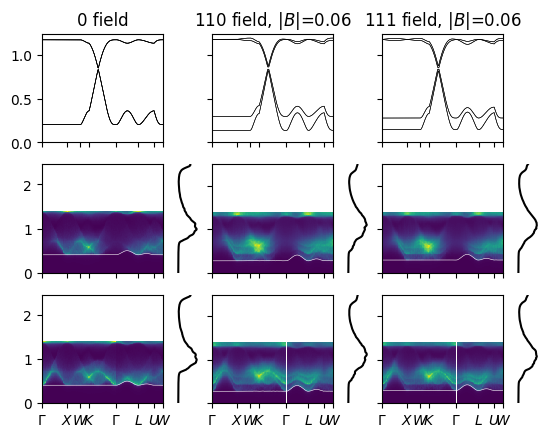

In [202]:
# PI FLUX

fig, Ax = plt.subplots(nrows=3, ncols=6,sharex=False, sharey=False,width_ratios=[3,0.5,3,0.5,3,0.5])

# autorange sweep
spinon_max_E=-float("inf")
intens_max_E=-float("inf")
intens_max_Spm=-float("inf")
intens_max_Smagnetic=-float("inf")

settings = settings_piflux


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])
    fsp = h5py.File("output/spinons"+settings[i])
    spinon_max_E = max(spinon_max_E, np.max(fsp["spinon_dispersion"]["bands"]))
    intens_max_E = max(intens_max_E, np.max(intensity_file["intensity"]["W"]))
    intens_max_Spm = max(intens_max_Spm, np.max(intensity_file["intensity"]["Spm"]["re_"]) )
    intens_max_Smagnetic = max(intens_max_Smagnetic, np.max(np.ma.masked_invalid(intensity_file["intensity"]["Smagnetic"])))


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])

    intens=intensity_file["intensity"]
    Ax[1][2*i].pcolormesh(intens["tau"], intens["W"], intens["Spm"]['re_'], shading='nearest')#, vmax=intens_max_Spm)
    Ax[2][2*i].pcolormesh(intens["tau"], intens["W"], intens["Smagnetic"],shading='nearest')#, vmax=intens_max_Smagnetic)

    for a in (Ax[1][2*i], Ax[2][2*i]):
        a.plot(np.array(intens["tau"]), intens["bounds"][0], color='w',lw=0.4)
        a.plot(np.array(intens["tau"]), intens["bounds"][1], color='w',lw=0.4)


    Ax[1][2*i].set_xticks(intens["ticks_tau"], labels=[])
    Ax[2][2*i].set_xticks(intens["ticks_tau"], labels=["$%s$"%(x.decode("UTF8")) for x in intens["ticks_label"]])
              

    fsp = h5py.File("output/spinons"+settings[i])
    spinon_intens = fsp["spinon_dispersion"]
    Ax[0][2*i].plot(np.array(spinon_intens["tau"]), np.array(spinon_intens["bands"]).T, color='k', lw=0.4)
    Ax[0][2*i].set_ylim([0,spinon_max_E+0.05])
    Ax[0][2*i].set_xticks(spinon_intens["ticks_tau"], labels=[])
    Ax[0][2*i].set_xlim( [np.min(spinon_intens["ticks_tau"]), np.max(spinon_intens["ticks_tau"])])

    fint = h5py.File("output/integrated"+settings[i])
    W = np.array(fint['intensity']['W'])
    Ax[1][2*i+1].plot(fint['intensity']['Spm']['re_'], W,color='k')
    Ax[2][2*i+1].plot(np.array(fint['intensity']['Smagnetic']), W,color='k')
    
    Ax[1][2*i+1].set_ylim([0,intens_max_E])
    Ax[2][2*i+1].set_ylim([0,intens_max_E])
    Ax[1][2*i+1].axis('off')
    Ax[2][2*i+1].axis('off')

    for j in range(3):
        Ax[j][2*i+1].set_yticklabels([])
        if i != 0:
            Ax[j][2*i].set_yticklabels([])
            
    
    Ax[0][2*i+1].axis('off')
    for j in [1,2]:
        a = Ax[j][2*i+1]
        a.set_xticks([])
        a.set_yticks([])
        # a.set_xlim([0,489384])

Ax[0][0].set_title("0 field")
Ax[0][2].set_title("110 field, $|B|$=0.06")
Ax[0][4].set_title("111 field, $|B|$=0.06")

In [217]:
fsp = h5py.File("output/spinons"+settings_piflux[0])
spinon_intens = fsp["spinon_dispersion"]
print(np.max(spinon_intens["bands"]))

fSQW = h5py.File("output/SQW"+settings_piflux[0])
np.max(fSQW["intensity"]["W"])


1.1722827054224194


1.4

Text(0.5, 1.0, '111 field, $|B|$=0.06')

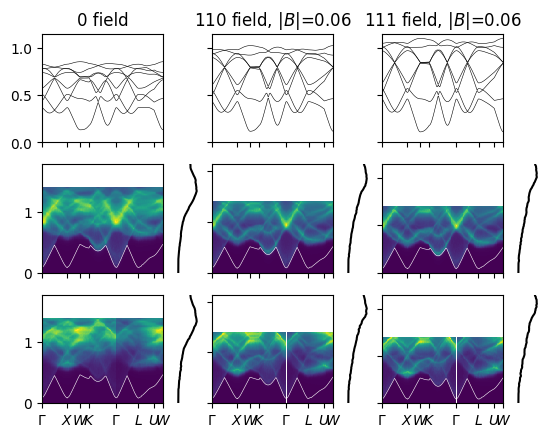

In [200]:
# PI PI 0 0 

fig, Ax = plt.subplots(nrows=3, ncols=6,sharex=False, sharey=False,width_ratios=[3,0.5,3,0.5,3,0.5])

# autorange sweep
spinon_max_E=-float("inf")
intens_max_E=-float("inf")
intens_max_Spm=-float("inf")
intens_max_Smagnetic=-float("inf")

settings = settings_pipi00


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])
    fsp = h5py.File("output/spinons"+settings[i])
    spinon_max_E = max(spinon_max_E, np.max(fsp["spinon_dispersion"]["bands"]))
    intens_max_E = max(intens_max_E, np.max(intensity_file["intensity"]["W"]))
    intens_max_Spm = max(intens_max_Spm, np.max(intensity_file["intensity"]["Spm"]["re_"]) )
    intens_max_Smagnetic = max(intens_max_Smagnetic, np.max(np.ma.masked_invalid(intensity_file["intensity"]["Smagnetic"])))


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])

    intens=intensity_file["intensity"]
    Ax[1][2*i].pcolormesh(intens["tau"], intens["W"], intens["Spm"]['re_'], shading='nearest')#, vmax=intens_max_Spm)
    Ax[2][2*i].pcolormesh(intens["tau"], intens["W"], intens["Smagnetic"],shading='nearest')#, vmax=intens_max_Smagnetic)

    for a in (Ax[1][2*i], Ax[2][2*i]):
        a.plot(np.array(intens["tau"]), intens["bounds"][0], color='w',lw=0.4)
        a.plot(np.array(intens["tau"]), intens["bounds"][1], color='w',lw=0.4)


    Ax[1][2*i].set_xticks(intens["ticks_tau"], labels=[])
    Ax[2][2*i].set_xticks(intens["ticks_tau"], labels=["$%s$"%(x.decode("UTF8")) for x in intens["ticks_label"]])
              

    fsp = h5py.File("output/spinons"+settings[i])
    spinon_intens = fsp["spinon_dispersion"]
    Ax[0][2*i].plot(np.array(spinon_intens["tau"]), np.array(spinon_intens["bands"]).T, color='k', lw=0.4)
    Ax[0][2*i].set_ylim([0,spinon_max_E+0.05])
    Ax[0][2*i].set_xticks(spinon_intens["ticks_tau"], labels=[])
    Ax[0][2*i].set_xlim( [np.min(spinon_intens["ticks_tau"]), np.max(spinon_intens["ticks_tau"])])

    fint = h5py.File("output/integrated"+settings[i])
    W = np.array(fint['intensity']['W'])
    Ax[1][2*i+1].plot(fint['intensity']['Spm']['re_'], W,color='k')
    Ax[2][2*i+1].plot(np.array(fint['intensity']['Smagnetic']), W,color='k')
    
    Ax[1][2*i+1].set_ylim([min(W),max(W)])
    Ax[2][2*i+1].set_ylim([min(W),max(W)])
    Ax[1][2*i+1].axis('off')
    Ax[2][2*i+1].axis('off')

    for j in range(3):
        Ax[j][2*i+1].set_yticklabels([])
        if i != 0:
            Ax[j][2*i].set_yticklabels([])
            
    
    Ax[0][2*i+1].axis('off')
    for j in [1,2]:
        a = Ax[j][2*i+1]
        a.set_xticks([])
        a.set_yticks([])
        # a.set_xlim([0,489384])

Ax[0][0].set_title("0 field")
Ax[0][2].set_title("110 field, $|B|$=0.06")
Ax[0][4].set_title("111 field, $|B|$=0.06")